In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from rl_utils import ReplayMemory, seed
import numpy as np
import torch
import torch.nn as nn
import os
from eval import n_game_match, tiered_arena, elo_from_arena_results
from agent import RandomAgent, MCTSAgent, RLAgent, MCTSConvAgent
import torch.multiprocessing
import matplotlib.pyplot as plt
from shobu import *

In [3]:
seed()
device = torch.device(
    "cuda" if torch.cuda.is_available() else
    "cpu"
)
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
torch.autograd.set_detect_anomaly(True)

In [12]:
from agent import RandomAgent, MCTSAgent, RLAgent
'''

'''
newcomers = [
    MCTSAgent("mcts_checkpoint_9128/mcts_checkpoint_84000_explore_random.pth", cpuct=1.1), # exp coefficient
]
old = [
    RandomAgent(), # random
    RLAgent("checkpoints/ppo_checkpoint_50000.pth", name="ppo_50k"), # ppo model 
    RLAgent("checkpoints/ppo_checkpoint_100000.pth", name="ppo_100k"), # ppo model
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_100.pth"), # random MCTS
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_4000.pth"), # early training
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_8000_v2.pth"), # increased exploration coefficient
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_12000_noisy_random.pth"), # random positions
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_16000_noisy_random.pth"), # random positions
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_12000_start.pth"), # ablation: no random positions
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_16000_start_.pth"), # ablation: no random positions
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_20000_noisy_random.pth"), # random positions
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_24000_noisy_random.pth"), # random positions
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_28000_noisy_random.pth"), # random positions
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_32000_noisy_random.pth"), # ablation: no warm annealed restart
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_36000_noisy_random.pth"), # ablation: no warm annealed restart
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_40000.pth"), # ablation: no warm annealed restart
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_36000_more_random.pth"), # ablation: warm annealed restart, increased random positions
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_40000_more_random.pth"), # ablation: warm annealed restart, increased random positions
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_44000_more_random.pth"), # ablation: warm annealed restart, increased random positions
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_48000_more_random.pth"), # ablation: warm annealed restart, increased random positions
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_32000_explore_random.pth"), # warm annealed restart
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_36000_explore_random.pth"), # warm annealed restart 
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_40000_explore_random.pth"), # warm annealed restart  
    RLAgent("checkpoints/ppo_checkpoint_10000.pth", name="ppo_10k"), # ppo model
    RLAgent("checkpoints/ppo_checkpoint_20000.pth", name="ppo_20k"), # ppo model
    RLAgent("checkpoints/ppo_checkpoint_30000.pth", name="ppo_30k"), # ppo model
    RLAgent("checkpoints/ppo_checkpoint_40000.pth", name="ppo_40k"), # ppo model
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_44000_explore_random.pth"), # warm annealed restart
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_48000_explore_random.pth"), # warm annealed restart
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_44000_no_restart_ablation.pth"), # ablation: no warm annealed restart
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_48000_no_restart_ablation.pth"), # ablation: no warm annealed restart
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_52000_explore_random.pth"), # warm annealed restart
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_56000_explore_random.pth"), # warm annealed restart
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_52000_no_restart_ablation.pth"), # ablation: no warm annealed restart
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_60000_explore_random.pth"), # warm annealed restart
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_64000_explore_random.pth", cpuct=1.1), # exp coefficient
    MCTSAgent("mcts_checkpoint_9128/mcts_checkpoint_68000_explore_random.pth", cpuct=1.1), # exp coefficient
    MCTSAgent("mcts_checkpoint_9128/mcts_checkpoint_72000_explore_random.pth", cpuct=1.1), # exp coefficient
    MCTSAgent("mcts_checkpoint_9128/mcts_checkpoint_76000_explore_random.pth", cpuct=1.1), # exp coefficient
    MCTSAgent("mcts_checkpoint_9128/mcts_checkpoint_80000_explore_random.pth", cpuct=1.1), # exp coefficient
]

In [13]:
torch.multiprocessing.set_sharing_strategy('file_system')
tiered_arena(newcomer_agents=newcomers, established_agents=old, output_csv_dir="evaluations/", n_games_between_each=20)

Playing arena with 1 newcomers and 40 established agents.


  0%|          | 0/800 [00:00<?, ?it/s]/oscar/data/yma16/schang59/shobu_rl/bitboard_utils.py:83: RuntimeWarning: overflow encountered in scalar negative
  return int((x & -x)).bit_length() - 1
/oscar/data/yma16/schang59/shobu_rl/bitboard_utils.py:83: RuntimeWarning: overflow encountered in scalar negative
  return int((x & -x)).bit_length() - 1
/oscar/data/yma16/schang59/shobu_rl/bitboard_utils.py:83: RuntimeWarning: overflow encountered in scalar negative
  return int((x & -x)).bit_length() - 1
/oscar/data/yma16/schang59/shobu_rl/bitboard_utils.py:83: RuntimeWarning: overflow encountered in scalar negative
  return int((x & -x)).bit_length() - 1
/oscar/data/yma16/schang59/shobu_rl/bitboard_utils.py:83: RuntimeWarning: overflow encountered in scalar negative
  return int((x & -x)).bit_length() - 1
/oscar/data/yma16/schang59/shobu_rl/bitboard_utils.py:83: RuntimeWarning: overflow encountered in scalar negative
  return int((x & -x)).bit_length() - 1
/oscar/data/yma16/schang59/shobu_rl/b

Done running, collecting results...
Done collecting results, writing to file...
Done, file written to evaluations/arena_results_1_vs_40_2025:04:28-23:58:07.csv


In [14]:
elo_from_arena_results(ingest_dir="evaluations/", output_csv_path="evaluations/elos.csv", elo_sigma=200)

## Deeper Evaluation

In [ ]:
from agent import RandomAgent, MCTSAgent, RLAgent
from eval import tiered_arena
from eval import tiered_arena
import torch.multiprocessing


newcomers_sub = [
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_64000_explore_random.pth", cpuct=1.1), # exp coefficient
    MCTSAgent("mcts_checkpoint_9128/mcts_checkpoint_84000_explore_random.pth", cpuct=1.1), # exp coefficient
]
old_sub = [
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_100.pth"), # random MCTS
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_16000_noisy_random.pth"), # random positions
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_32000_noisy_random.pth"), # ablation: no warm annealed restart
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_40000.pth"), # ablation: no warm annealed restart
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_40000_explore_random.pth"), # warm annealed restart  
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_44000_explore_random.pth"), # warm annealed restart
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_48000_explore_random.pth"), # warm annealed restart
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_48000_no_restart_ablation.pth"), # ablation: no warm annealed restart
    MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_56000_explore_random.pth"), # warm annealed restart
]
torch.multiprocessing.set_sharing_strategy('file_system')
tiered_arena(newcomer_agents=newcomers_sub, established_agents=old_sub, output_csv_dir="deeper_eval/", n_games_between_each=100, max_moves=64)


Playing arena with 2 newcomers and 9 established agents.


  0%|          | 0/1900 [00:00<?, ?it/s]/oscar/data/yma16/schang59/shobu_rl/bitboard_utils.py:83: RuntimeWarning: overflow encountered in scalar negative
  return int((x & -x)).bit_length() - 1
/oscar/data/yma16/schang59/shobu_rl/bitboard_utils.py:83: RuntimeWarning: overflow encountered in scalar negative
  return int((x & -x)).bit_length() - 1
/oscar/data/yma16/schang59/shobu_rl/bitboard_utils.py:83: RuntimeWarning: overflow encountered in scalar negative
  return int((x & -x)).bit_length() - 1
/oscar/data/yma16/schang59/shobu_rl/bitboard_utils.py:83: RuntimeWarning: overflow encountered in scalar negative
  return int((x & -x)).bit_length() - 1
/oscar/data/yma16/schang59/shobu_rl/bitboard_utils.py:83: RuntimeWarning: overflow encountered in scalar negative
  return int((x & -x)).bit_length() - 1
/oscar/data/yma16/schang59/shobu_rl/bitboard_utils.py:83: RuntimeWarning: overflow encountered in scalar negative
  return int((x & -x)).bit_length() - 1
/oscar/data/yma16/schang59/shobu_rl/

In [ ]:
from eval import elo_from_arena_results
elo_from_arena_results(ingest_dir="deeper_eval/", output_csv_path="deeper_eval/elos.csv", elo_sigma=200)

# N game match

In [ ]:
torch.multiprocessing.set_sharing_strategy('file_system')
res = n_game_match(
             #MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_64500_explore_random.pth", cpuct=1.1),
             MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_84000_explore_random.pth"),
             MCTSAgent("mcts_checkpoint_9128/mcts_checkpoint_72000_explore_random.pth"), 
             n = 500, 
             max_moves = 64)

/oscar/data/yma16/schang59/shobu_rl/bitboard_utils.py:83: RuntimeWarning: overflow encountered in scalar negative
  return int((x & -x)).bit_length() - 1
/oscar/data/yma16/schang59/shobu_rl/bitboard_utils.py:83: RuntimeWarning: overflow encountered in scalar negative
  return int((x & -x)).bit_length() - 1
/oscar/data/yma16/schang59/shobu_rl/bitboard_utils.py:83: RuntimeWarning: overflow encountered in scalar negative
  return int((x & -x)).bit_length() - 1
/oscar/data/yma16/schang59/shobu_rl/bitboard_utils.py:83: RuntimeWarning: overflow encountered in scalar negative
  return int((x & -x)).bit_length() - 1
/oscar/data/yma16/schang59/shobu_rl/bitboard_utils.py:83: RuntimeWarning: overflow encountered in scalar negative
  return int((x & -x)).bit_length() - 1
/oscar/data/yma16/schang59/shobu_rl/bitboard_utils.py:83: RuntimeWarning: overflow encountered in scalar negative
  return int((x & -x)).bit_length() - 1
/oscar/data/yma16/schang59/shobu_rl/bitboard_utils.py:83: RuntimeWarning: ov

In [13]:
print(res)

((213, 52, 235), (127, 26, 97), (86, 26, 138), (1194, 1206))


## Model Viz

In [4]:
def viz_tensor_distr(tensor):
    flat_tensor = tensor.flatten().detach().numpy()

    plt.figure(figsize=(8, 5))
    plt.hist(flat_tensor, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title("Distribution of Tensor Values")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()

layer_0: torch.Size([1, 96, 4, 4])
block_3_layer_1: torch.Size([1, 96, 4, 4])
block_3_layer_2: torch.Size([1, 96, 4, 4])
block_4_layer_1: torch.Size([1, 96, 4, 4])
block_4_layer_2: torch.Size([1, 96, 4, 4])
block_5_layer_1: torch.Size([1, 96, 4, 4])
block_5_layer_2: torch.Size([1, 96, 4, 4])
block_6_layer_1: torch.Size([1, 96, 4, 4])
block_6_layer_2: torch.Size([1, 96, 4, 4])
block_7_layer_1: torch.Size([1, 96, 4, 4])
block_7_layer_2: torch.Size([1, 96, 4, 4])
block_8_layer_1: torch.Size([1, 96, 4, 4])
block_8_layer_2: torch.Size([1, 96, 4, 4])


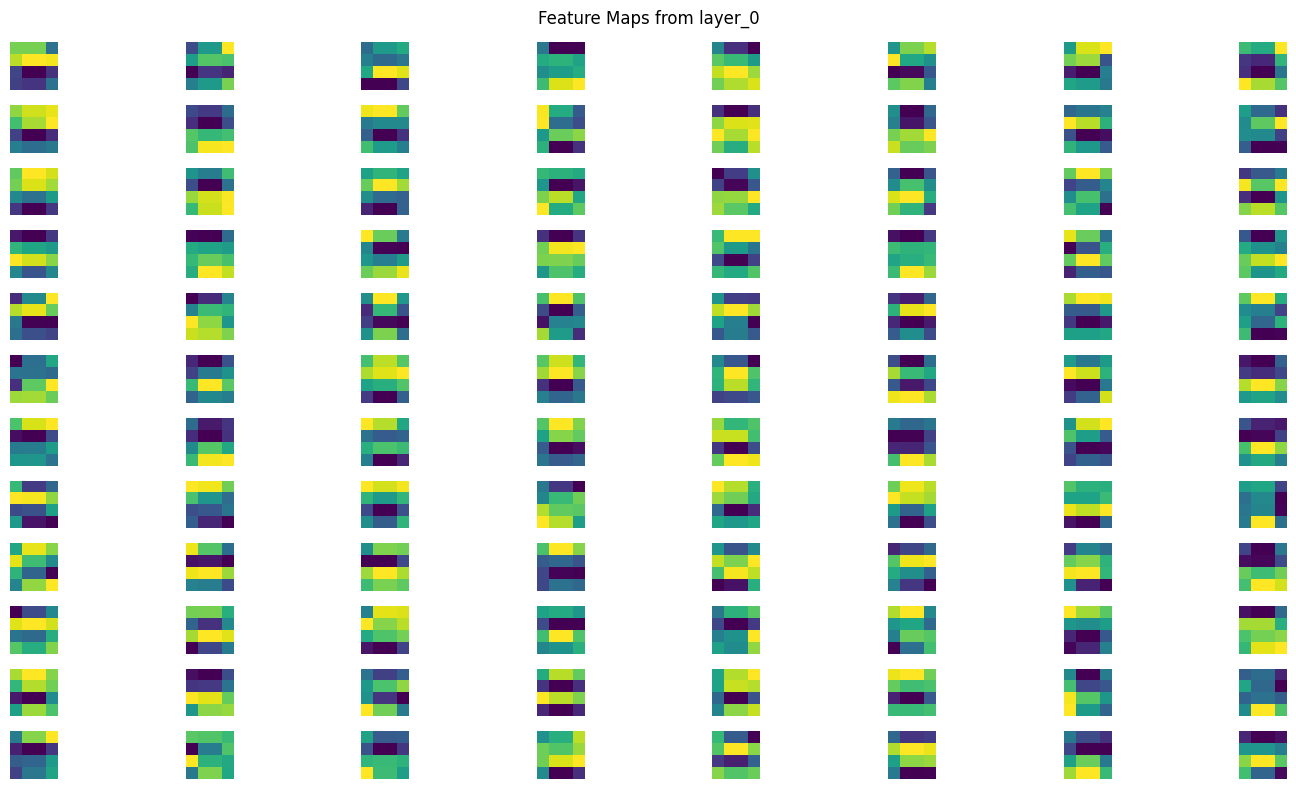

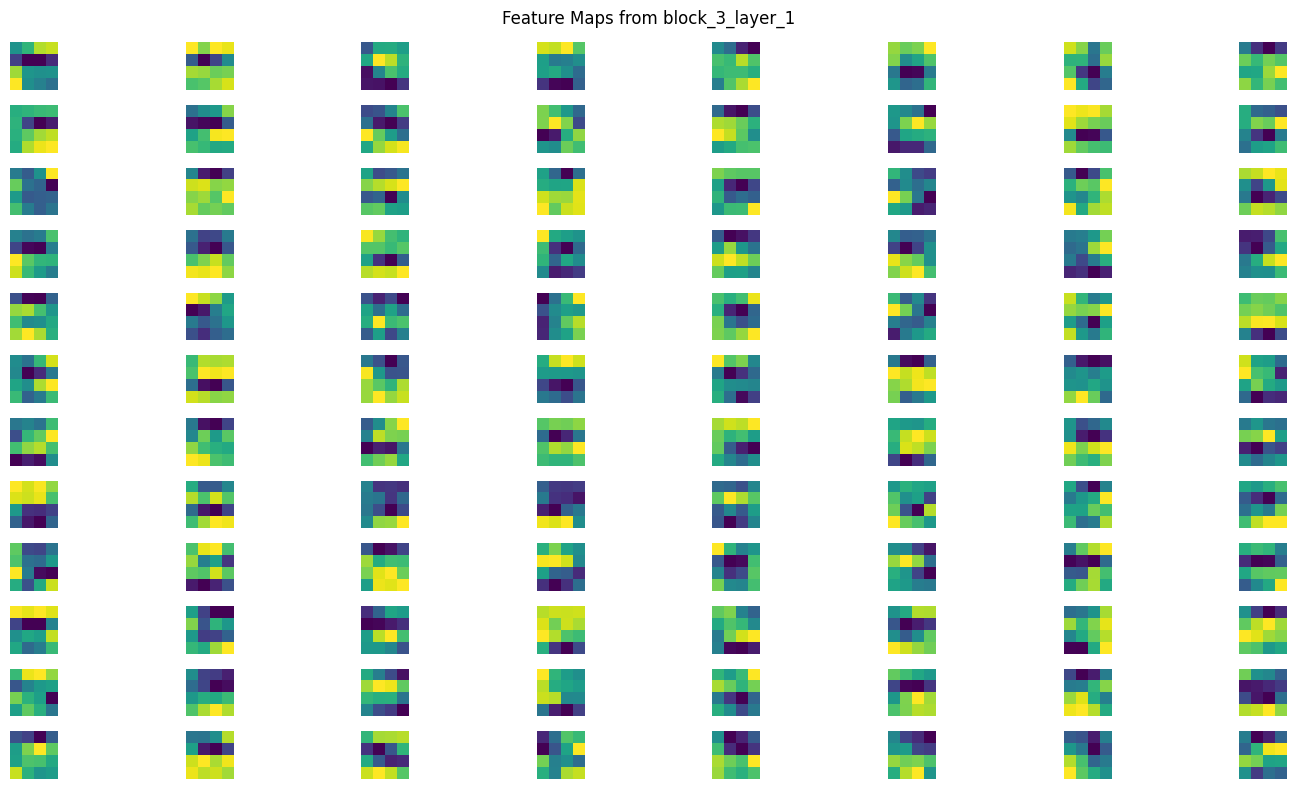

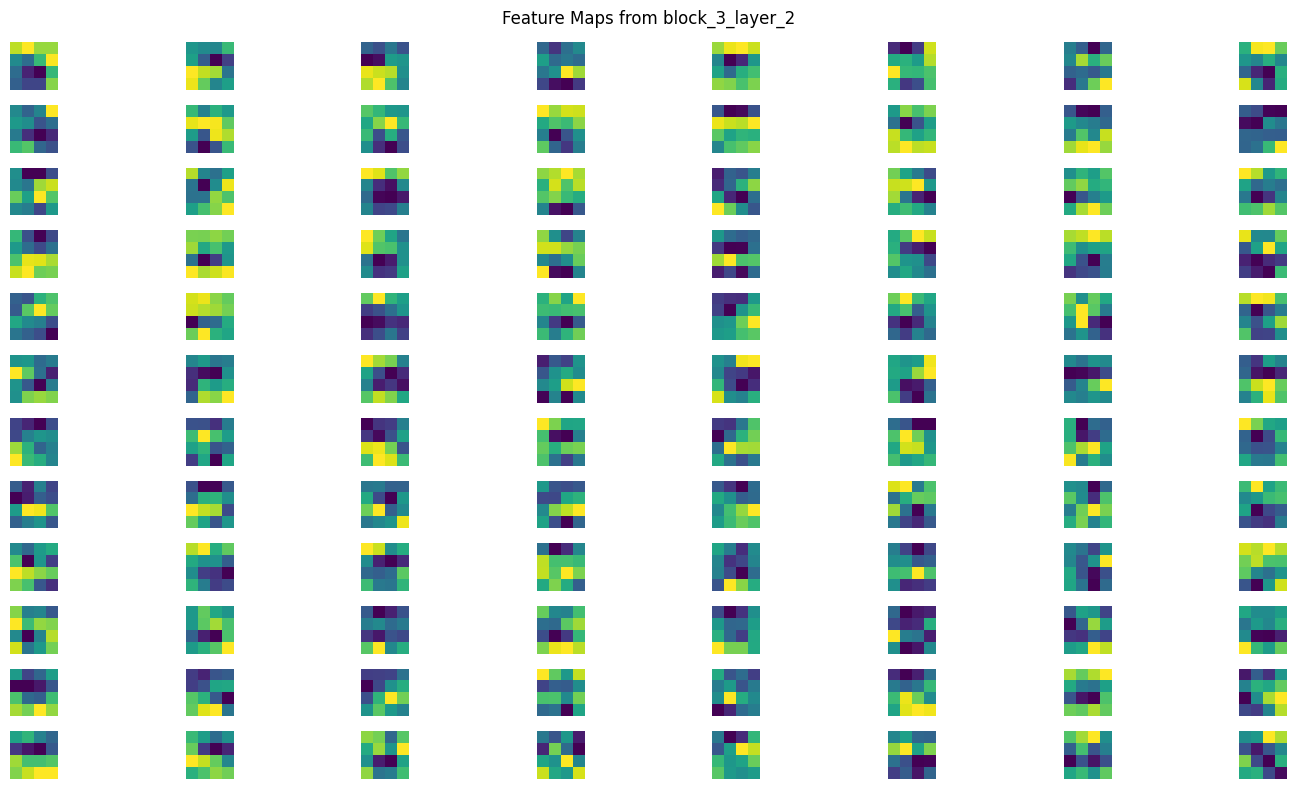

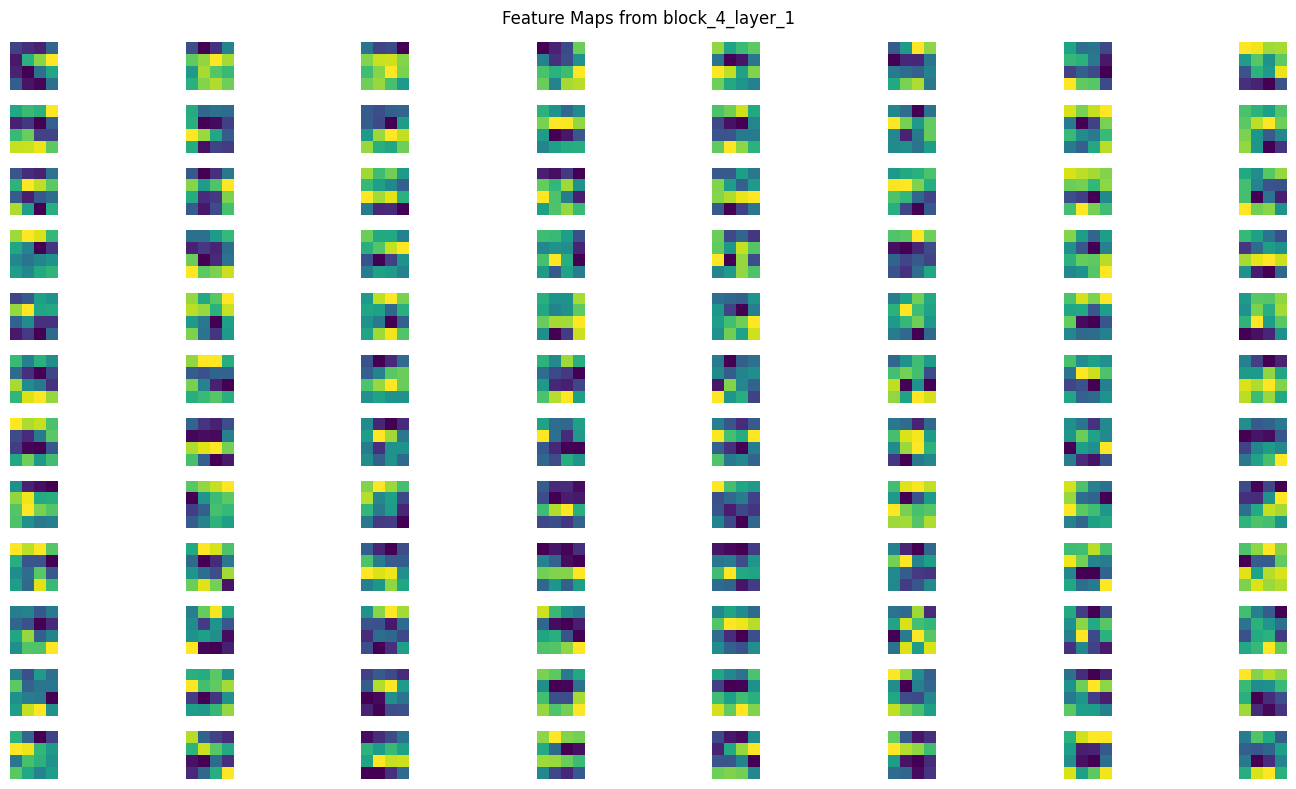

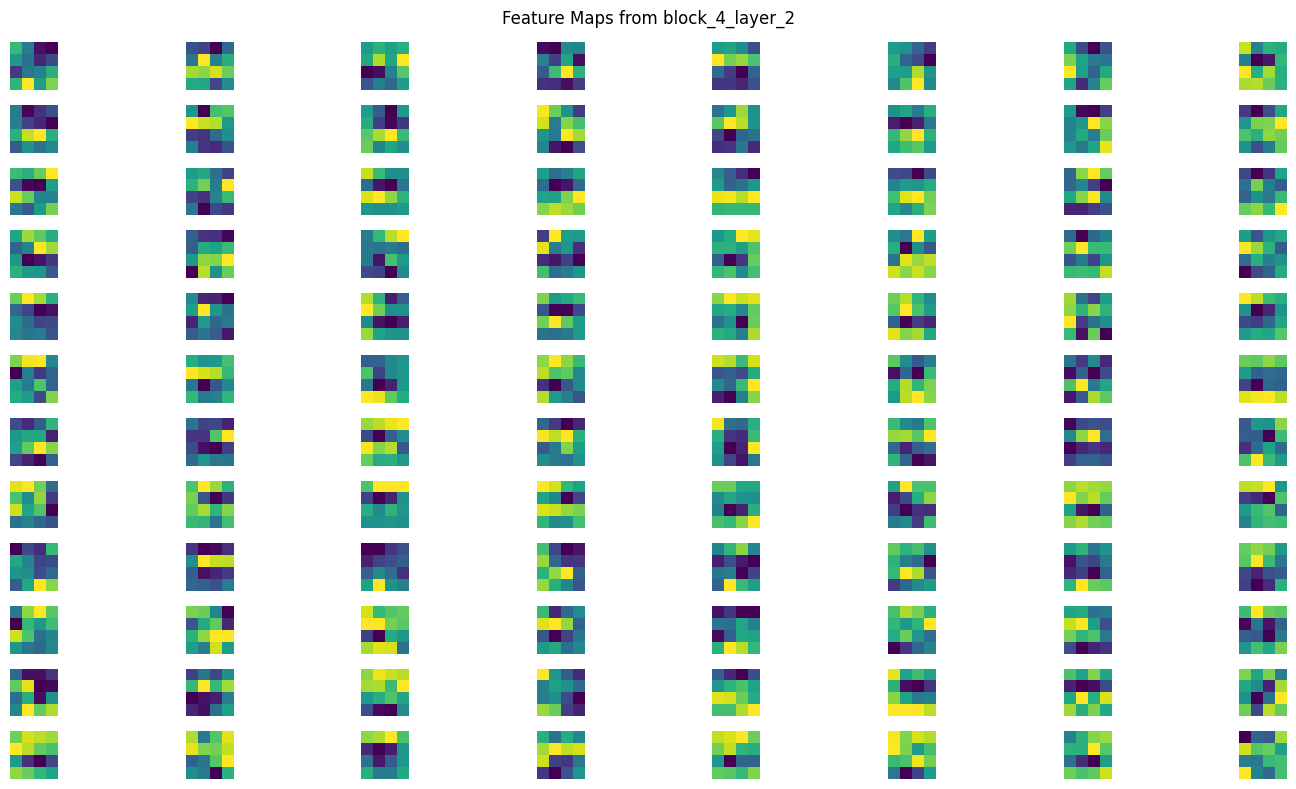

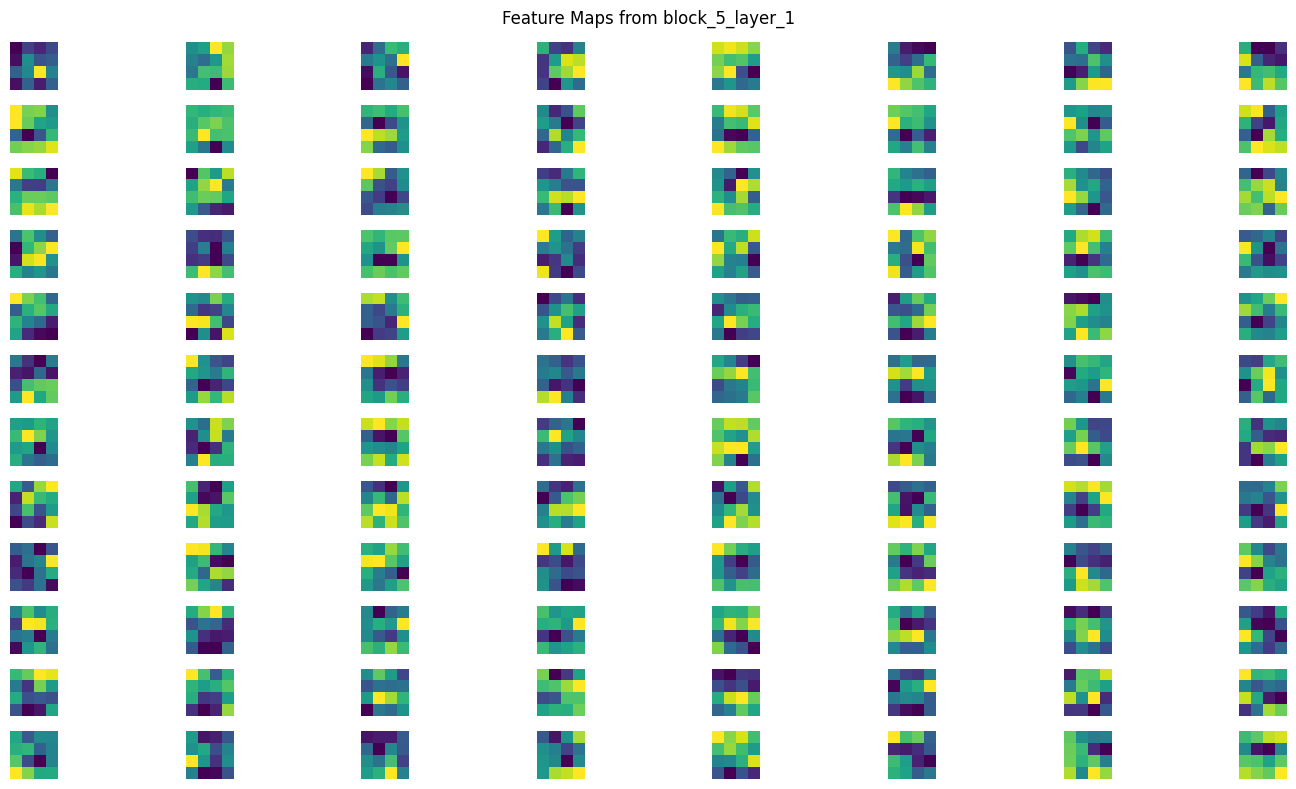

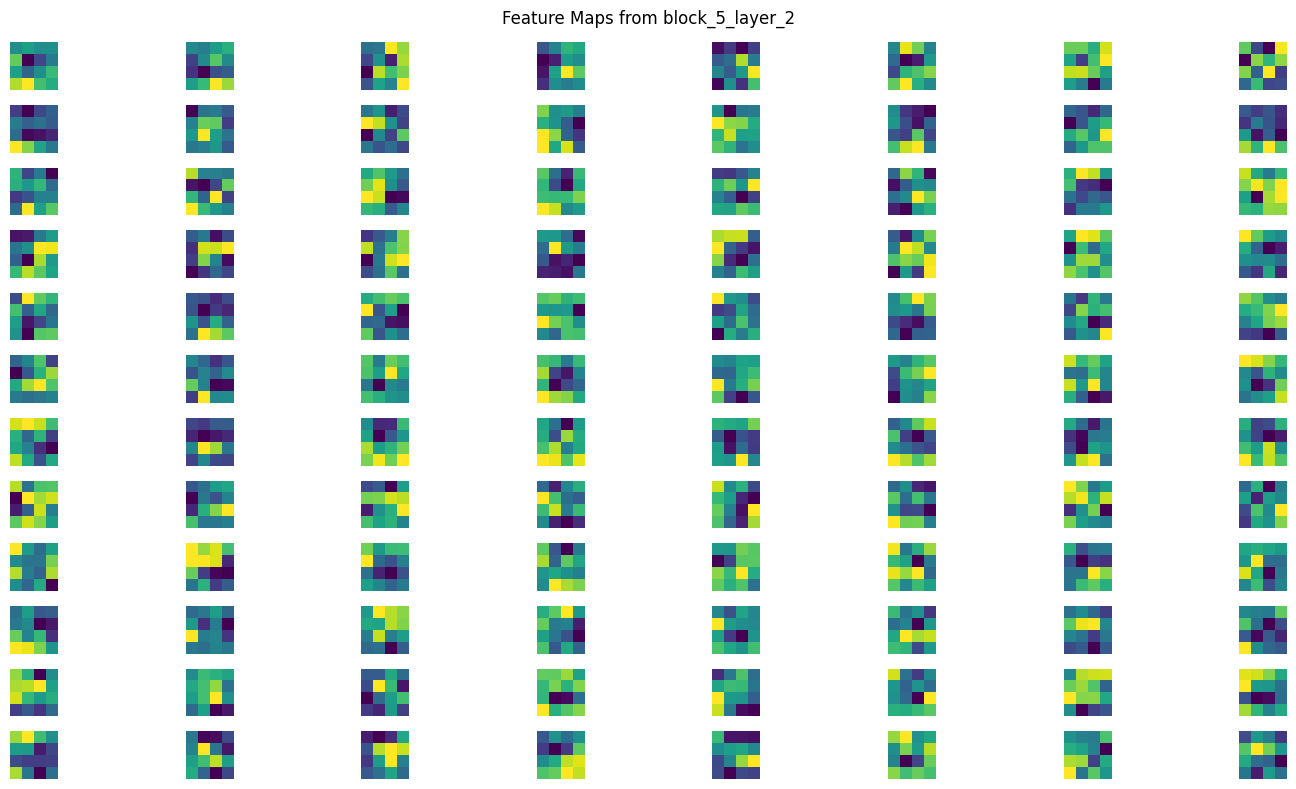

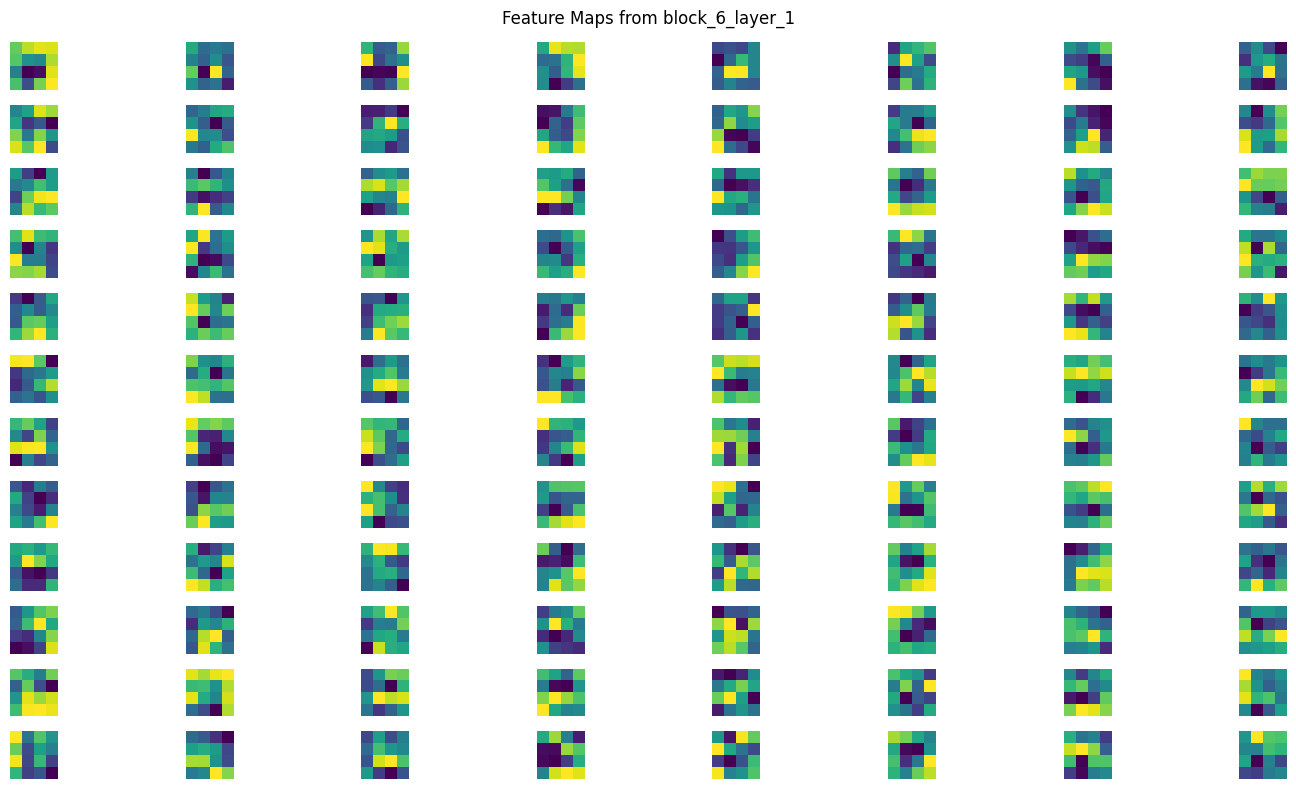

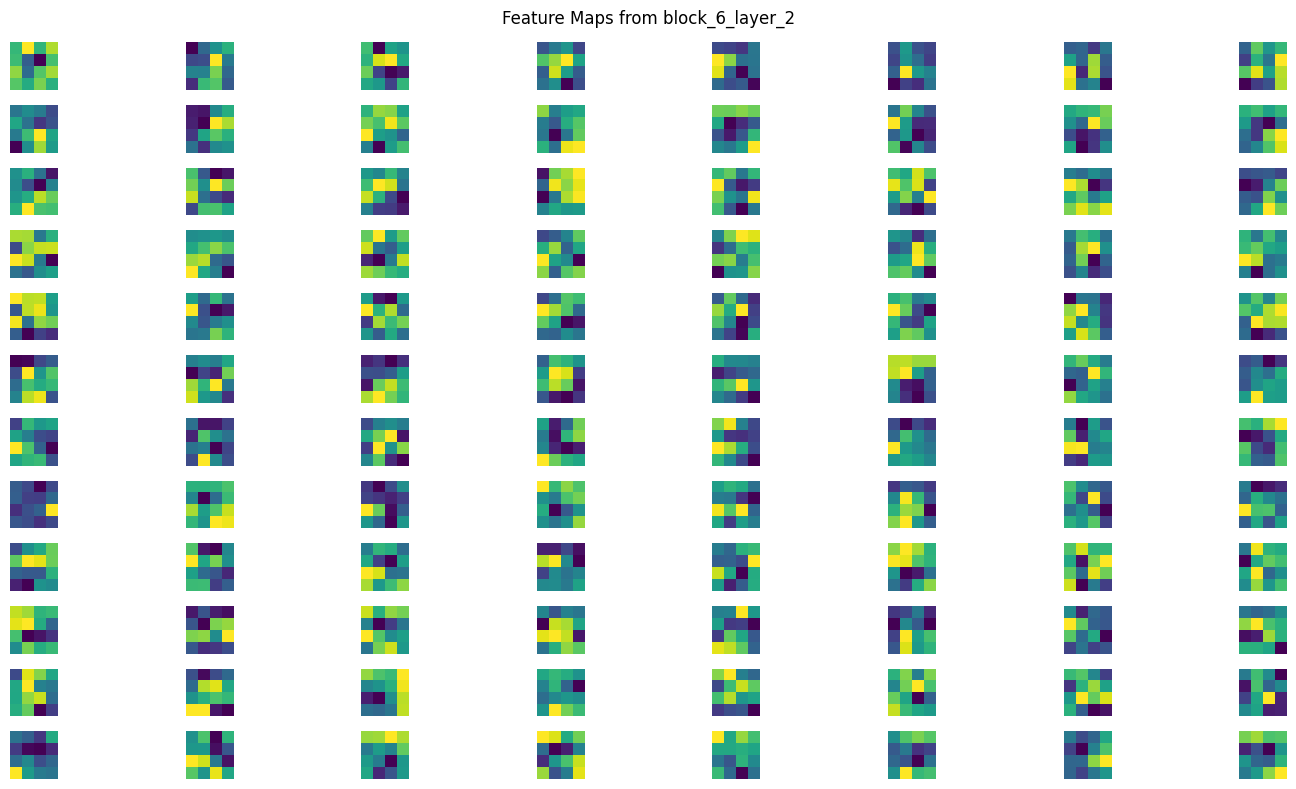

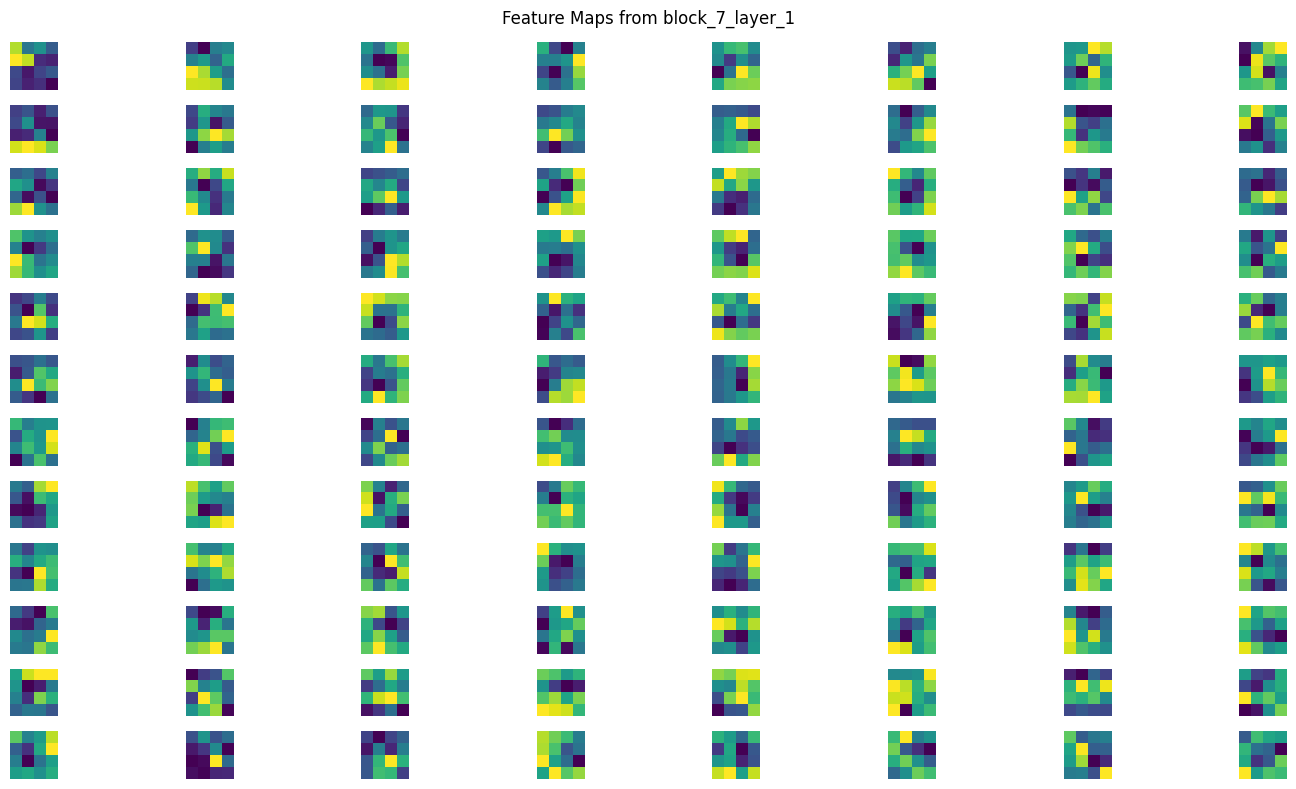

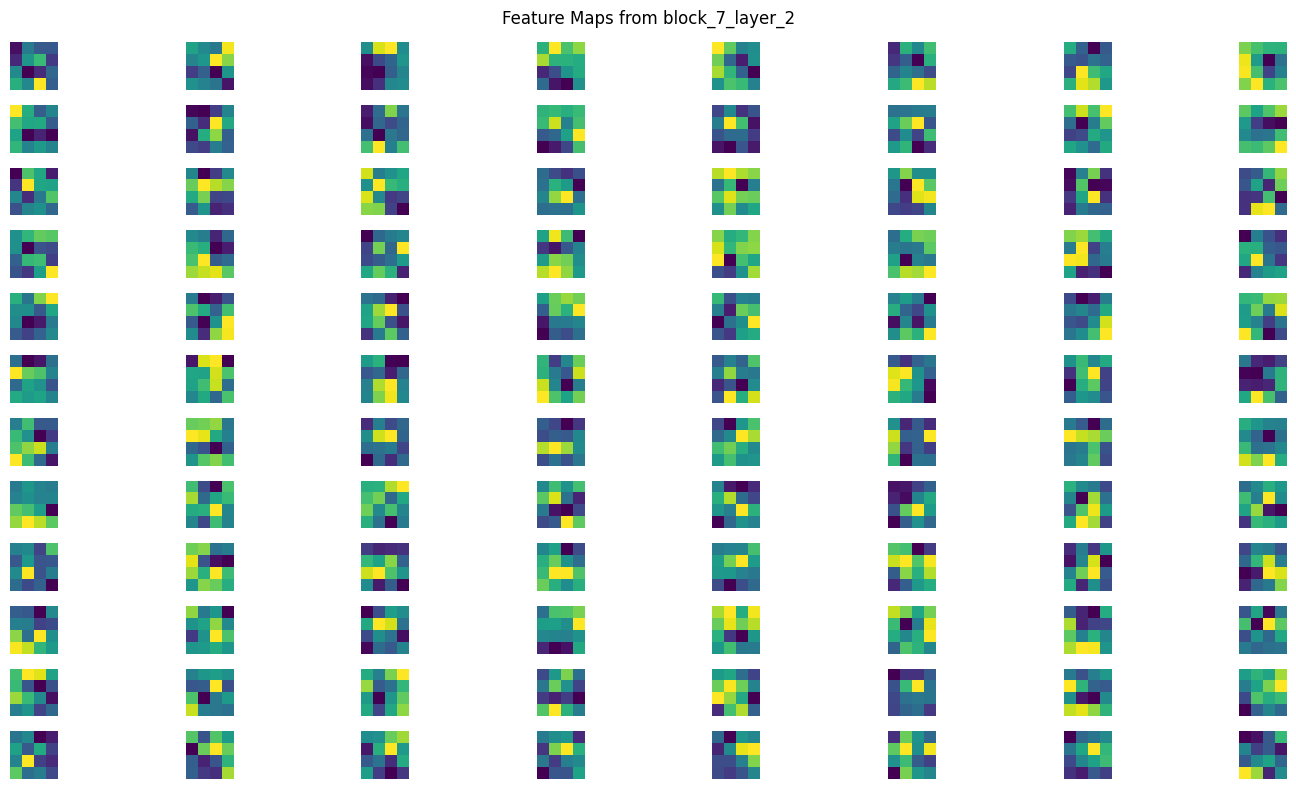

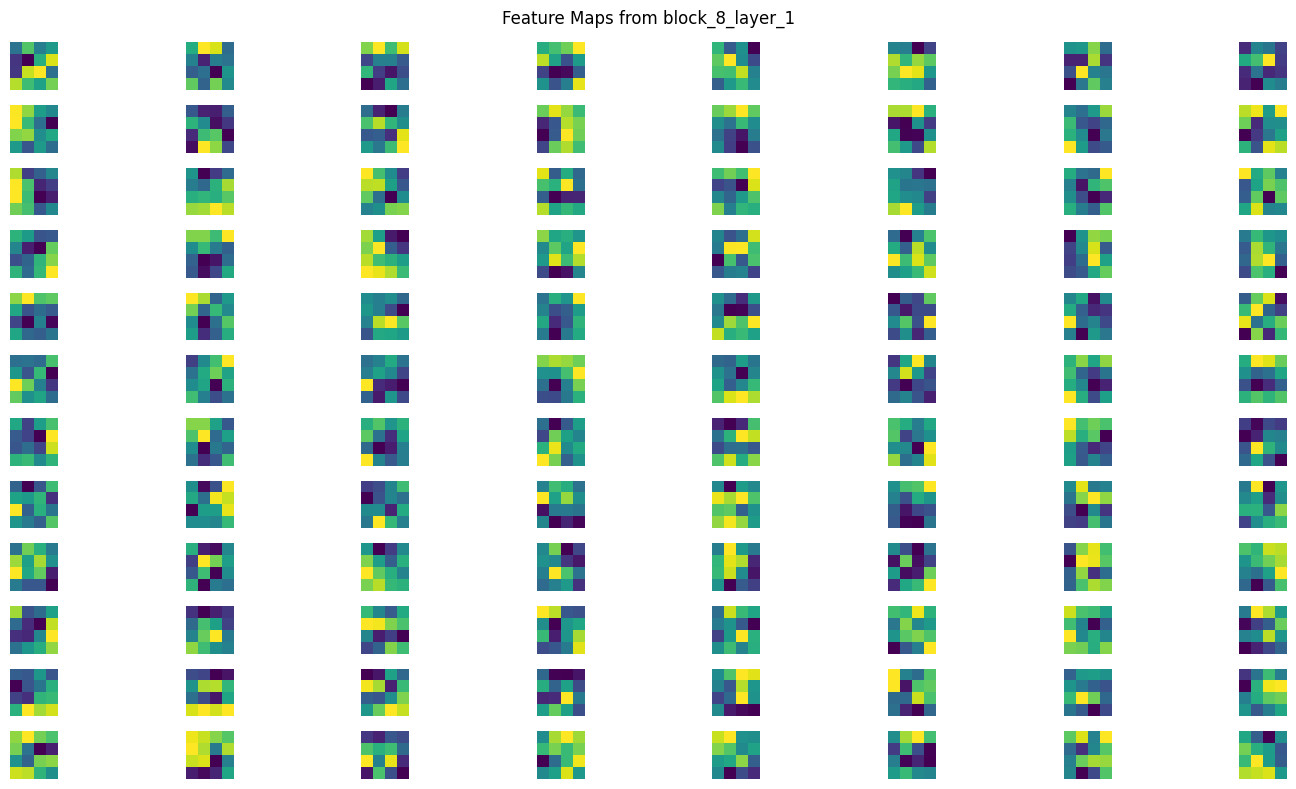

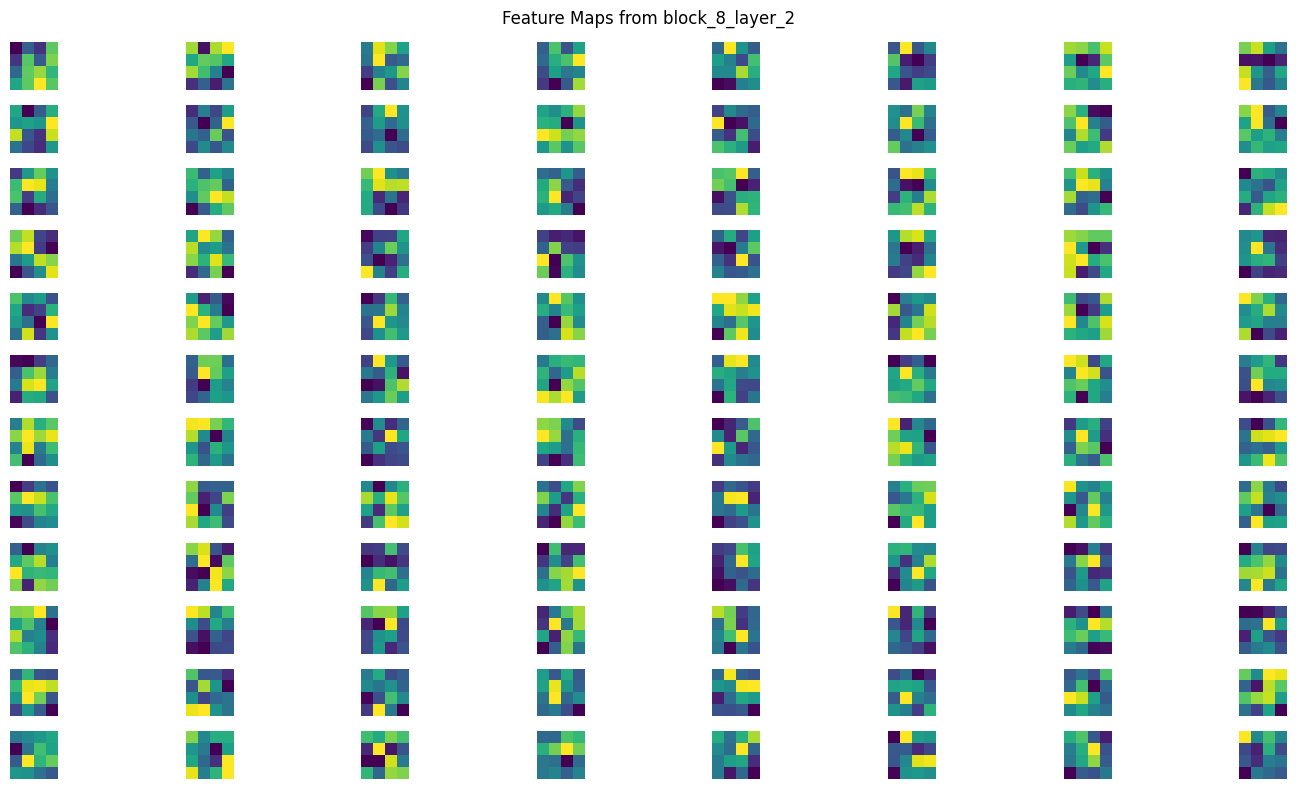

In [11]:
import torch.nn as nn
from models import ResidualBlock2D,Critic_MCTS

agent = MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_62200_explore_random.pth")
model = agent.model
feature_maps = OrderedDict()

def get_hook(name):
    def hook(module, input, output):
        feature_maps[name] = output.detach()
    return hook

hooks = []
net = agent.model.backbone
#net = agent.model.critic.net
#net = agent.model.passive_filter
for i,m in enumerate(net):
    if isinstance(m, nn.Conv2d):
        hooks.append(m.register_forward_hook(get_hook(f"layer_{i}")))
    elif isinstance(m, ResidualBlock2D):
        hooks.append(m.conv1.register_forward_hook(get_hook(f"block_{i}_layer_{1}")))
        hooks.append(m.conv2.register_forward_hook(get_hook(f"block_{i}_layer_{2}")))

board = Shobu.starting_position()
# board = Shobu.from_str(
# """
# w... ww..
# .w.. .w..
# .... ....
# bbbb bbbb

# .b.. ..ww
# .w.. ....
# ..w. .w..
# .bbb .b..
# """, next_mover=Player.BLACK)
state = torch.tensor(board.as_matrix(), device=torch.device('cpu'), dtype=torch.float32).unsqueeze(0)
with torch.no_grad():
    _ = model(state)

for name, fmap in feature_maps.items():
    print(f"{name}: {fmap.shape}")
    
for name, fmap in feature_maps.items():
    fmap = fmap.squeeze(0)  # remove batch dimension
    num_channels = min(96, fmap.shape[0])  # first 16 channels

    plt.figure(figsize=(15, 8))
    plt.suptitle(f"Feature Maps from {name}")
    for i in range(num_channels):
        plt.subplot(12, 8, i + 1)
        plt.imshow(fmap[i].cpu(), cmap='viridis')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Conv2d(8, 96, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)


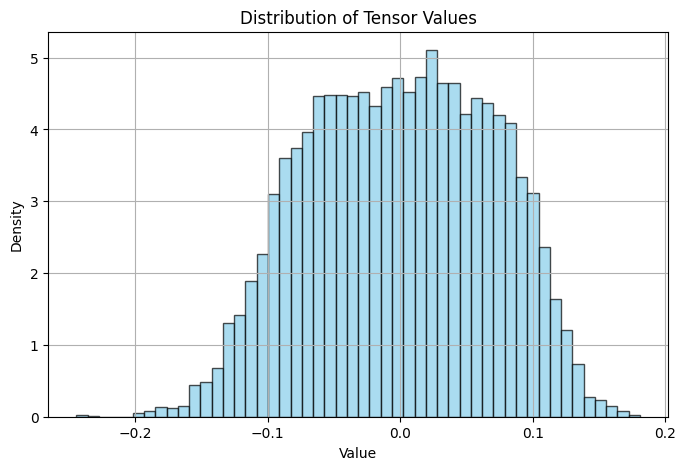

BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
ReLU()
ResidualBlock2D(
  (conv1): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
  (conv2): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
  (b1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (b2): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


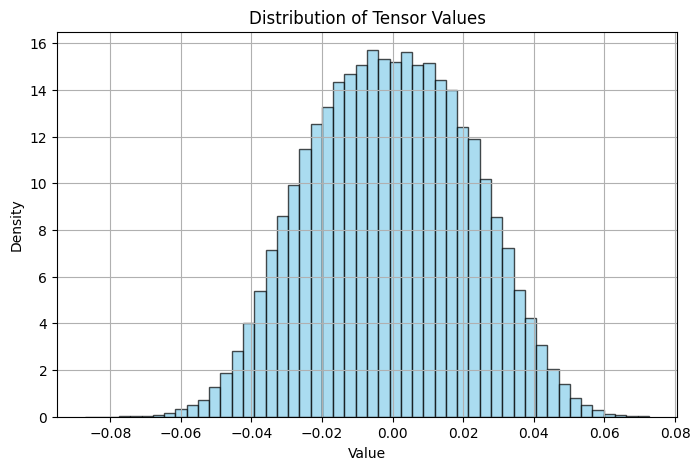

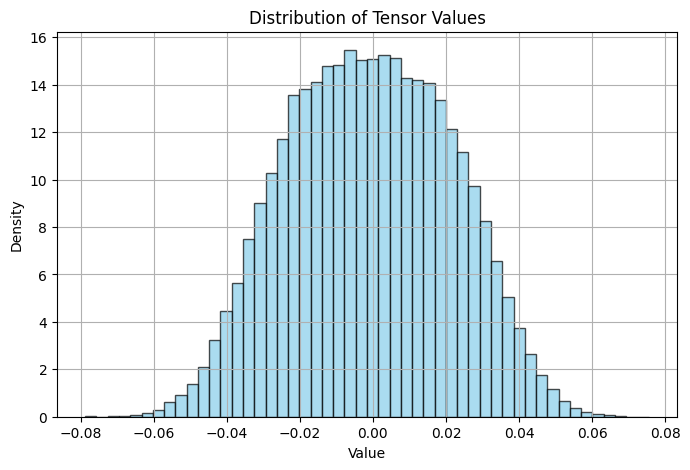

ResidualBlock2D(
  (conv1): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
  (conv2): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
  (b1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (b2): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


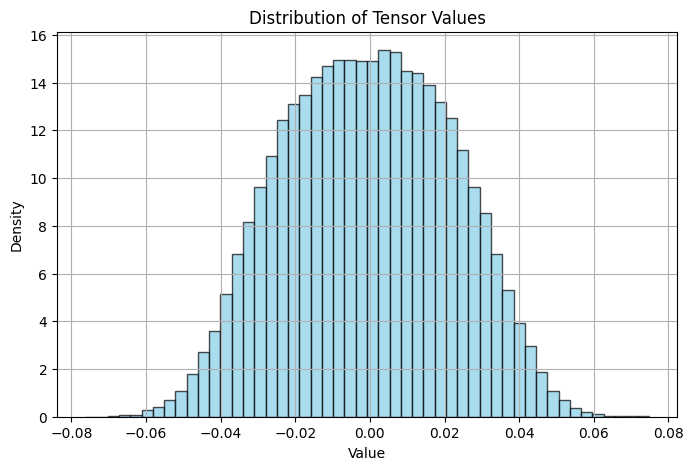

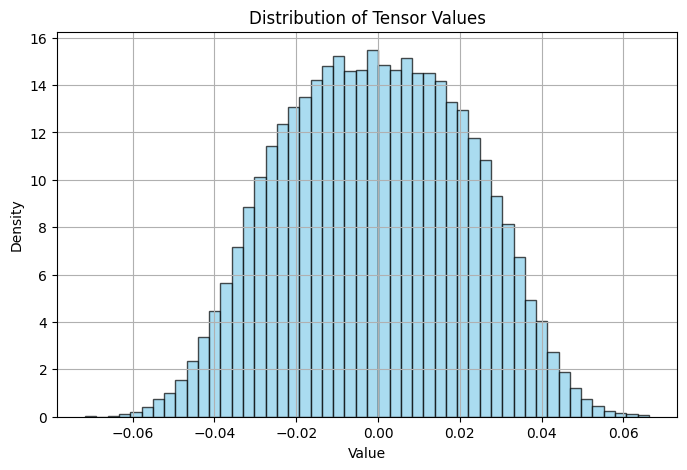

ResidualBlock2D(
  (conv1): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
  (conv2): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
  (b1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (b2): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


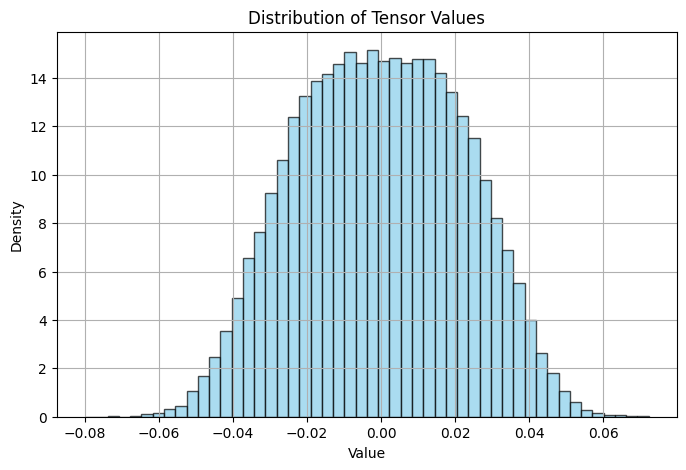

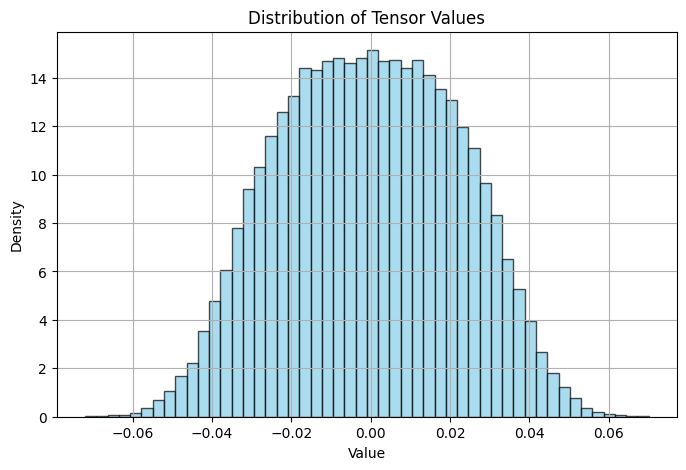

ResidualBlock2D(
  (conv1): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
  (conv2): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
  (b1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (b2): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


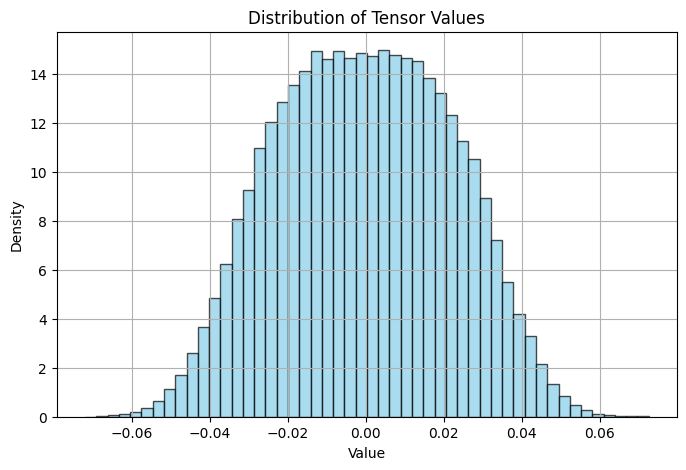

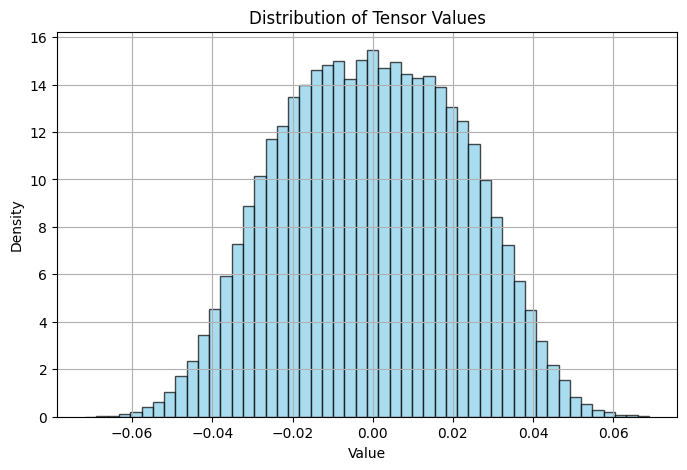

ResidualBlock2D(
  (conv1): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
  (conv2): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
  (b1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (b2): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


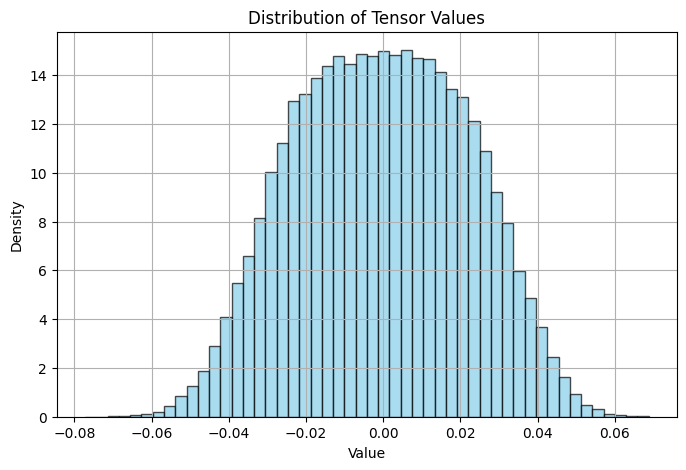

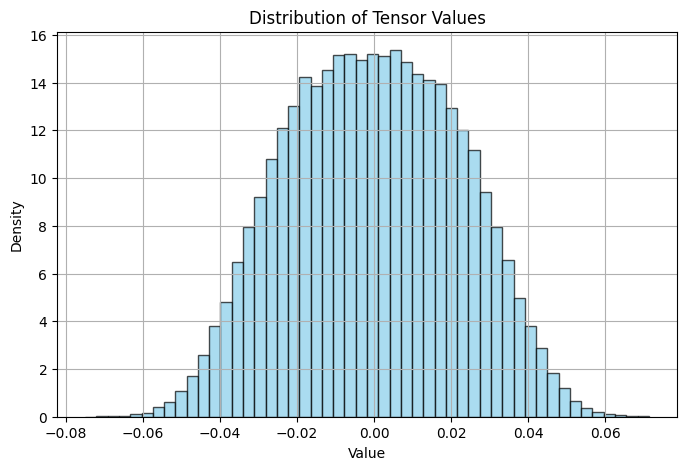

ResidualBlock2D(
  (conv1): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
  (conv2): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
  (b1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (b2): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


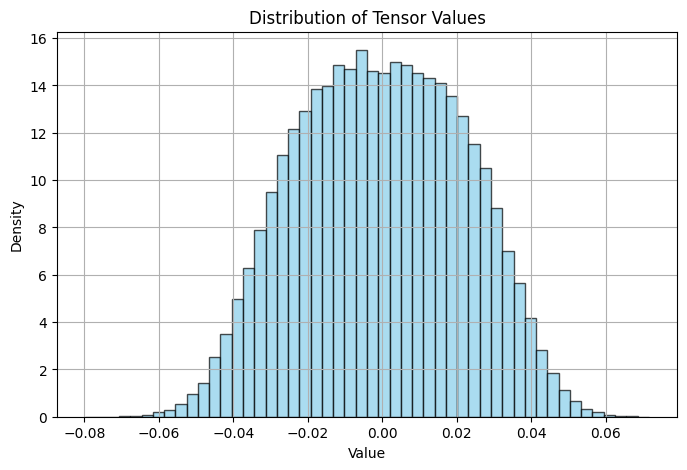

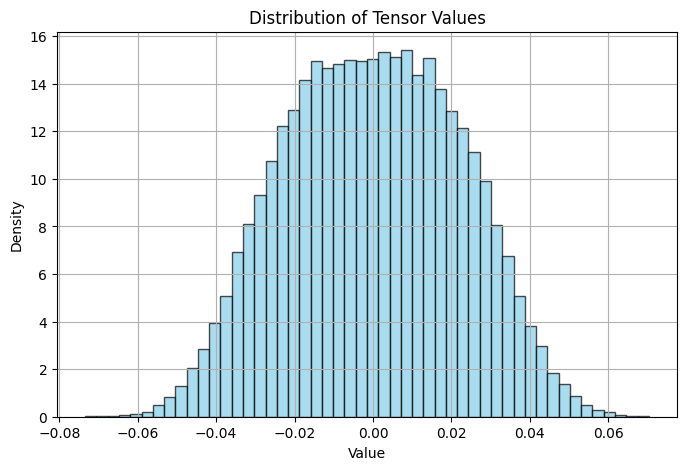

In [70]:
import torch.nn as nn
from models import ResidualBlock2D,Critic_MCTS

agent = MCTSAgent("mcts_checkpoints_696/mcts_checkpoint_49600_explore_random.pth")
net = agent.model.backbone
#net = agent.model.critic.net
#net = agent.model.passive_filter
#net = agent.model.passive_pos_head.net
#net = agent.model.passive_dir_head.net
#net = agent.model.passive_dist_head.net
#net = agent.model.aggressive_pos_head.net

for m in net:
    print(m)
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        viz_tensor_distr(m.weight)
    elif isinstance(m, ResidualBlock2D):
        viz_tensor_distr(m.conv1.weight)
        viz_tensor_distr(m.conv2.weight)
    elif isinstance(m, Critic_MCTS):
        viz_tensor_distr(m.conv1.weight)
        viz_tensor_distr(m.conv2.weight)